In [1]:
#Импрот
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#Загружаем датасет
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


class_names = ['Футболка / топ', "Шорты", "Свитер", "Платье",
              "Плащ", "Сандали", "Рубашка", "Кроссовок", "Сумка",
              "Ботинок"]

train_images = train_images / 255.0
test_images = test_images / 255.0

#Нейронная сеть
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4989 - accuracy: 0.8246
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3734 - accuracy: 0.8658
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3349 - accuracy: 0.8778
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3121 - accuracy: 0.8848
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3422 - accuracy: 0.8780
Test accuracy: 0.878000020980835
[3.6089559e-06 3.1352923e-07 2.0368047e-05 4.0372097e-09 3.6640411e-06
 2.7693729e-03 4.8525058e-06 9.9216262e-03 2.1044351e-04 9.8706579e-01]


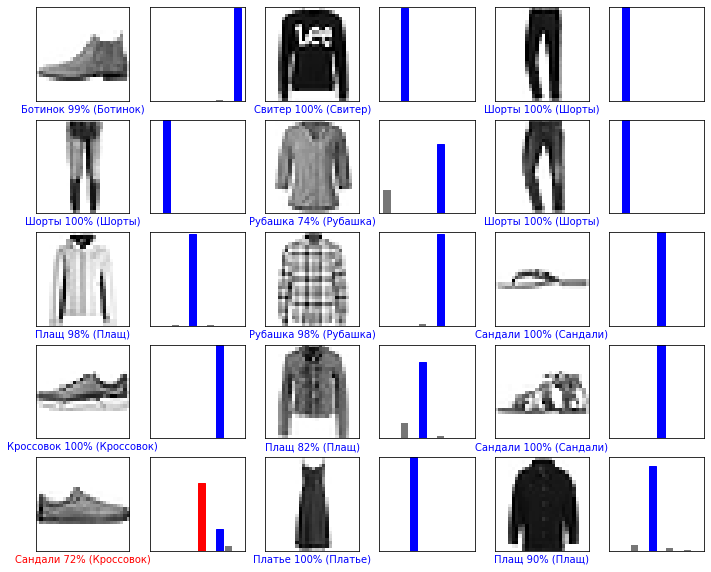

In [2]:
#Компилируем модель
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Тренируем модель
model.fit(train_images, train_labels, epochs=5)

#Сравниваем модель в тестовом наборе данных
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

#Прогнозирование
predictions = model.predict(test_images)
print(predictions[0])

#Визуализация предсказаний
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                      100 * np.max(predictions_array),
                                      class_names[true_label]),
                                      color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#Смотрим несколько изображений с их прогнозами
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i + 1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i + 2)
  plot_value_array(i, predictions, test_labels)

plt.show()